In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('csv/prelim_datasets/gameandgrade.csv')

In [ ]:
df.head()

In [ ]:
# # Apply Label Encoding for Ordered Categories
# ordinal_columns = ["Family_History", "Radiation_Exposure", "Thyroid_Cancer_Risk"]
# encoder = LabelEncoder()

# for col in ordinal_columns:
#     df[col] = encoder.fit_transform(df[col])

In [ ]:
# # Apply One-Hot Encoding to the data
# df = pd.get_dummies(df, columns=["Ethnicity", "Smoking", "Obesity",
#                                  "Diabetes", "Iodine_Deficiency"
#                                 ], drop_first=True)

In [ ]:
# x = df.drop(columns=["Thyroid_Cancer_Risk", "Patient_ID", "Gender", "Country", "Diagnosis"])
# y = df["Thyroid_Cancer_Risk"]

In [ ]:
# x = df.drop(columns=["Heart_Risk"])
# y = df["Heart_Risk"]

In [ ]:
# remove the double dots from a certain entry from the Grade column (very sneaky)

df["Grade"] = df["Grade"].str.replace(r"\.\.", ".", regex=True)

In [42]:
# x = df.drop(columns=["Grade", "School Code"])
x = df[["Playing Often", "Playing Hours", "Playing Games", "Sex", "Playing Years"]]
y = df["Grade"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [44]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
print(f"Intercept (b): {model.intercept_:.2f}")  # The base score when all features are 0
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)


Intercept (b): 81.56
               Coefficient
Playing Often     1.820753
Playing Hours    -0.226559
Playing Games   -10.637166
Sex              -2.102693
Playing Years     0.739209


In [46]:
y_pred = model.predict(x_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 281.72
R² Score: 0.08


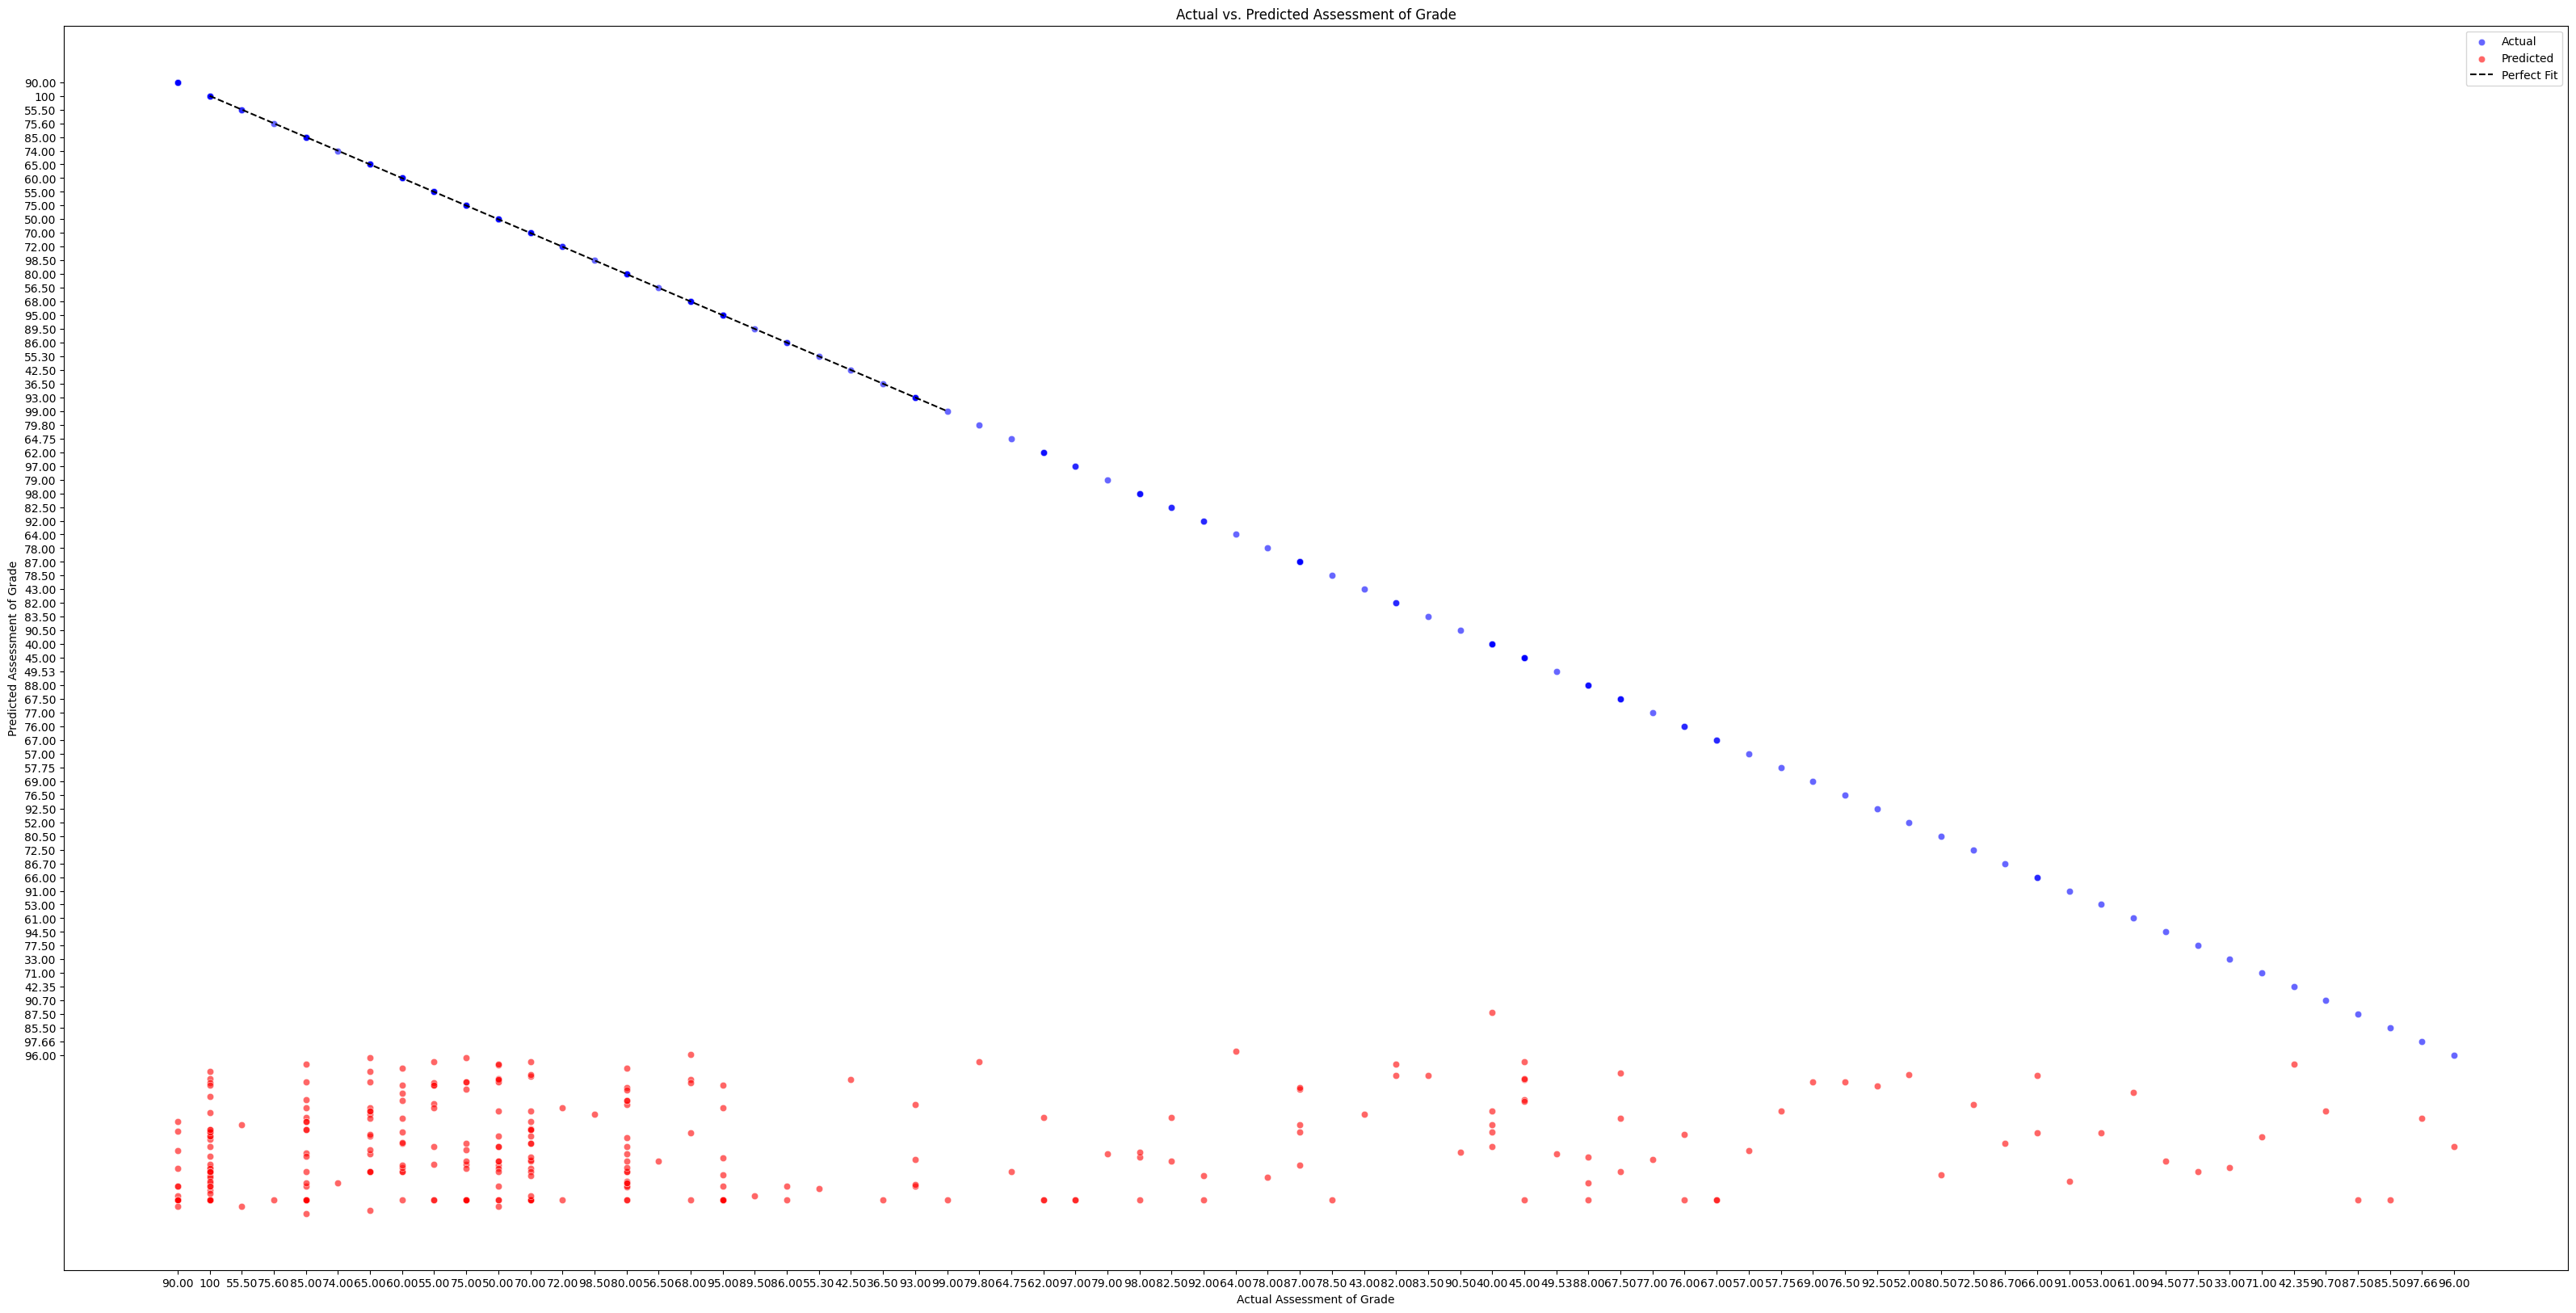

In [48]:
# Create scatter plot
plt.figure(figsize=(40, 20))
sns.scatterplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Assessment of Grade")
plt.ylabel("Predicted Assessment of Grade")
plt.title("Actual vs. Predicted Assessment of Grade")
plt.legend()
plt.show()